part 1

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kstest
from distfit import distfit

In [2]:
marks_2024 = pd.read_csv('all_marks_2024 - all_marks_2024.csv',low_memory=False)
score_bins = pd.read_csv('2023_2024_score_bins - 2023_2024_score_bins.csv')

In [3]:
# Check for missing values
missing_values = marks_2024['Marks'].isnull().sum()
print(f"Missing values: {missing_values}")


Missing values: 1


In [4]:
marks_2024 = marks_2024.dropna() 
pd.options.display.float_format = '{:.2f}'.format
summary_stats = marks_2024['Marks'].describe()
print(summary_stats)

count   2315408.00
mean        217.13
std         166.23
min        -180.00
25%          87.00
50%         163.00
75%         313.00
max         720.00
Name: Marks, dtype: float64


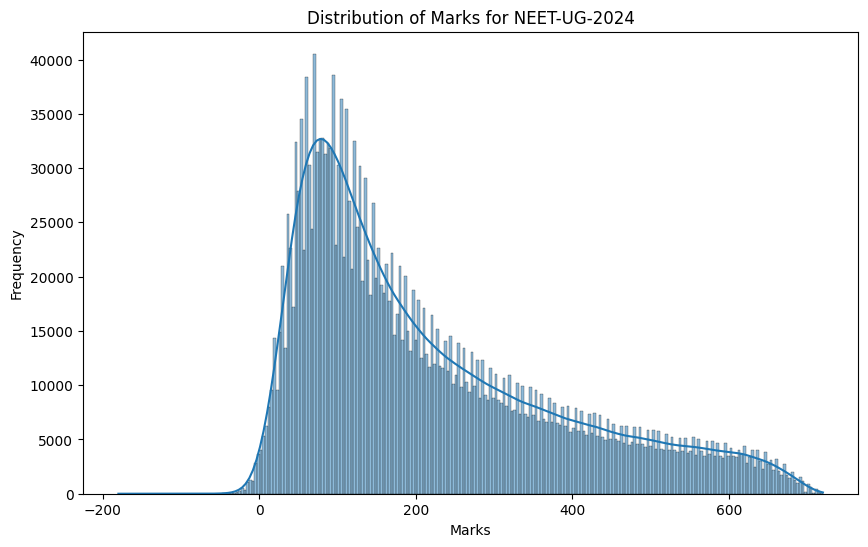

In [5]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(marks_2024['Marks'], kde=True)
plt.title('Distribution of Marks for NEET-UG-2024')
plt.xlabel('Marks')
plt.ylabel('Frequency')
plt.show()

In [6]:
dfit = distfit(method='parametric', todf=True)


dfit.fit_transform(marks_2024['Marks'])

dfit.model

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.04 sec] [RSS: 0.000196941] [loc=217.129 scale=166.229]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 0.000472942] [loc=-180.000 scale=397.129]
[distfit] >INFO> [pareto    ] [5.68 sec] [RSS: 0.000472942] [loc=-8589934725.931 scale=8589934545.931]
[distfit] >INFO> [dweibull  ] [56.0 sec] [RSS: 0.000187416] [loc=217.499 scale=148.504]
[distfit] >INFO> [t         ] [267. sec] [RSS: 0.000197113] [loc=217.188 scale=166.161]
[distfit] >INFO> [genextreme] [165. sec] [RSS: 4.59682e-05] [loc=127.775 scale=102.451]
[distfit] >INFO> [gamma     ] [93.8 sec] [RSS: 8.2595e-05] [loc=-89.005 scale=74.737]
[distfit] >INFO> [lognorm   ] [75.6 sec] [RSS: 8.80749e-05] [loc=-180.160 scale=367.004]
[distfit] >INFO> [beta      ] [77.0 sec] [RSS: 0.000322334] [loc=-180.000 scale=900.012]
[distfit] >INFO> [uniform   ] [0.01 sec] [RSS: 0.000367995] [loc=-180.000 scale=900.000]
[distfit] >INFO> [loggamma  ] [43.7 sec] [RSS: 0.000199

{'name': 'genextreme',
 'score': 4.596816283016563e-05,
 'loc': 127.77452290654277,
 'scale': 102.45084250064741,
 'arg': (np.float64(-0.2628177266578182),),
 'params': (np.float64(-0.2628177266578182),
  np.float64(127.77452290654277),
  np.float64(102.45084250064741)),
 'model': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x141a27d3440>,
 'bootstrap_score': 0,
 'bootstrap_pass': None,
 'color': '#e41a1c',
 'CII_min_alpha': np.float64(30.121928753836926),
 'CII_max_alpha': np.float64(588.8599729534286)}

[distfit] >INFO> Ploting Summary.


(<Figure size 2000x1000 with 1 Axes>,
 <Axes: title={'center': 'Genextreme (best fit)'}, xlabel='Probability Density Function (PDF)', ylabel='RSS (goodness of fit test)'>)

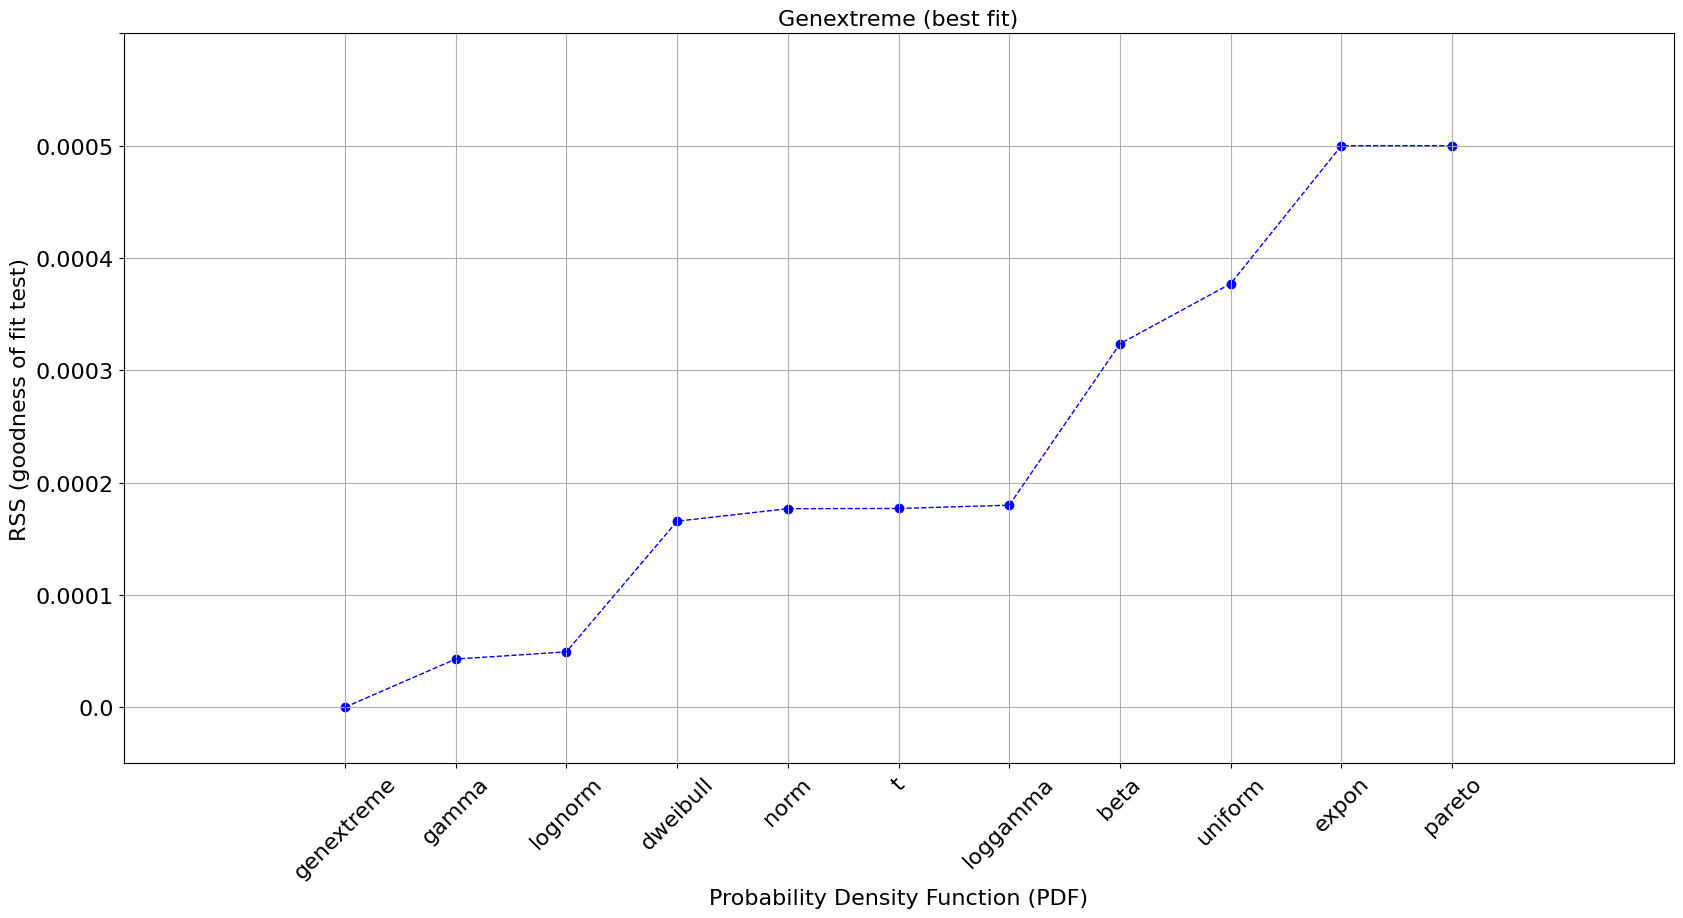

In [7]:

dfit.summary[['name', 'score', 'loc', 'scale']]

dfit.plot_summary()

part 2


In [11]:
binned_data_2023 = score_bins[score_bins['year'] == 2023]
binned_data_2024 = score_bins[score_bins['year'] == 2024]

# Calculate cumulative frequency for 2023
cdf_2023 = binned_data_2023['frequency'].cumsum() / binned_data_2023['frequency'].sum()

# Calculate cumulative frequency for 2024
cdf_2024 = binned_data_2024['frequency'].cumsum() / binned_data_2024['frequency'].sum()

# Perform Kolmogorov-Smirnov test
ks_result = kstest(cdf_2023, cdf_2024)

# Print results
print(ks_result)

KstestResult(statistic=np.float64(0.07362945178071229), pvalue=np.float64(0.9961132689221641), statistic_location=np.float64(0.9812721825549997), statistic_sign=np.int8(-1))


In [14]:
# Create a dictionary to store KS test results for each center
ks_results = {}

# Loop through each unique center in the 2024 dataset
for center in marks_2024['center_number'].unique():
    # Filter marks for the current center
    center_marks = marks_2024[marks_2024['center_number'] == center]['Marks'].values

    # Calculate the empirical CDF for center marks
    cdf_center = np.array(sorted(center_marks))
    cdf_center = np.arange(len(cdf_center)) / len(cdf_center)

    # Perform KS test
    ks_result = kstest(cdf_center, cdf_2023)

    # Store the KS test result for the center
    ks_results[center] = ks_result

# Print results
for center, result in ks_results.items():
    print(f"Center: {center}, KS test statistic: {result.statistic:.4f}, p-value: {result.pvalue:.5f}")

Center: 110101, KS test statistic: 0.2904, p-value: 0.00063
Center: 110102, KS test statistic: 0.2904, p-value: 0.00063
Center: 110103, KS test statistic: 0.2956, p-value: 0.00416
Center: 120101, KS test statistic: 0.2901, p-value: 0.00048
Center: 120102, KS test statistic: 0.2897, p-value: 0.00055
Center: 120103, KS test statistic: 0.2908, p-value: 0.00058
Center: 120104, KS test statistic: 0.2906, p-value: 0.00060
Center: 120105, KS test statistic: 0.2910, p-value: 0.00061
Center: 120106, KS test statistic: 0.2909, p-value: 0.00061
Center: 120107, KS test statistic: 0.2895, p-value: 0.00071
Center: 120108, KS test statistic: 0.2914, p-value: 0.00090
Center: 120201, KS test statistic: 0.2889, p-value: 0.00043
Center: 120202, KS test statistic: 0.2896, p-value: 0.00041
Center: 120203, KS test statistic: 0.2901, p-value: 0.00049
Center: 120204, KS test statistic: 0.2889, p-value: 0.00052
Center: 120205, KS test statistic: 0.2897, p-value: 0.00055
Center: 120206, KS test statistic: 0.289

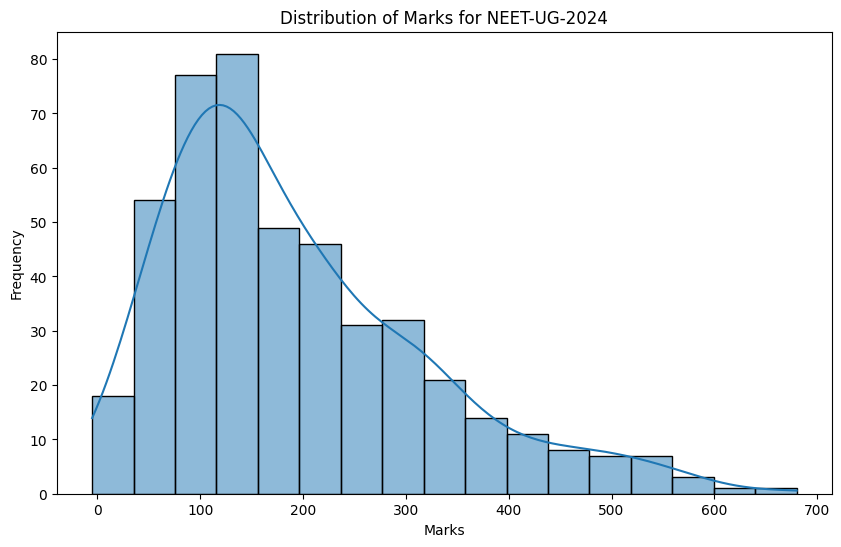

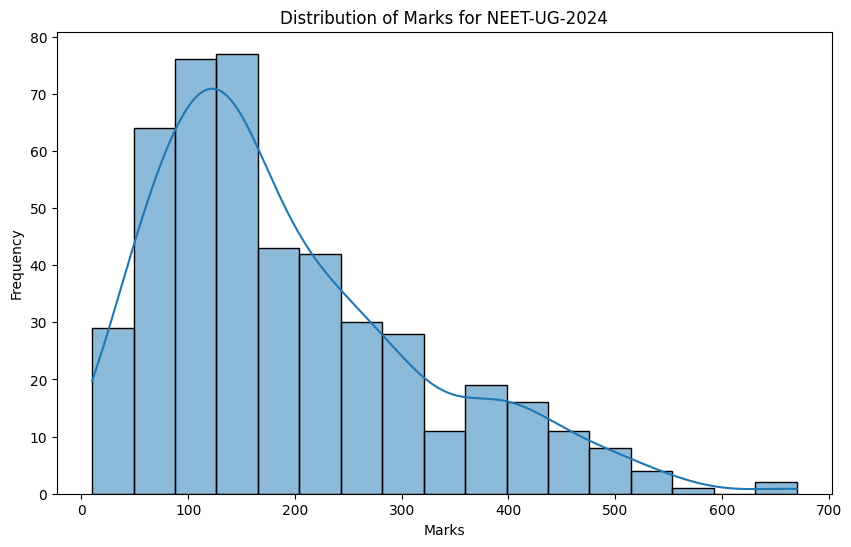

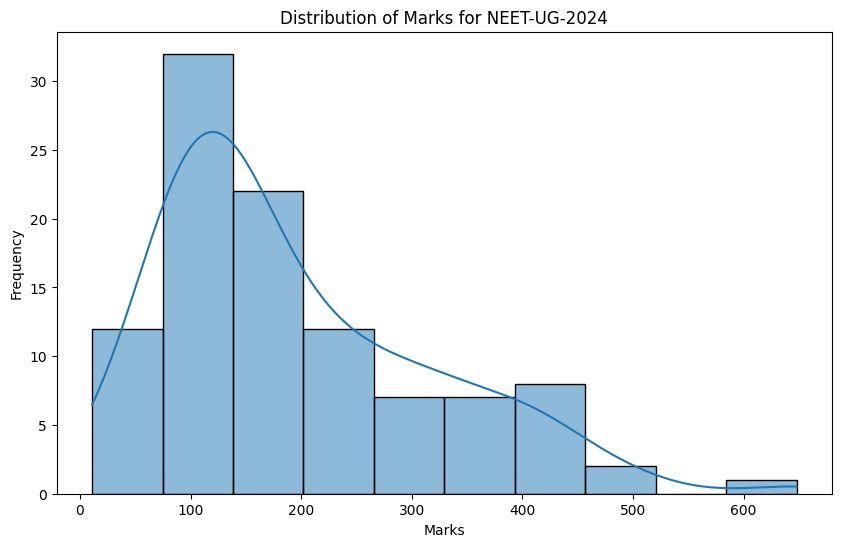

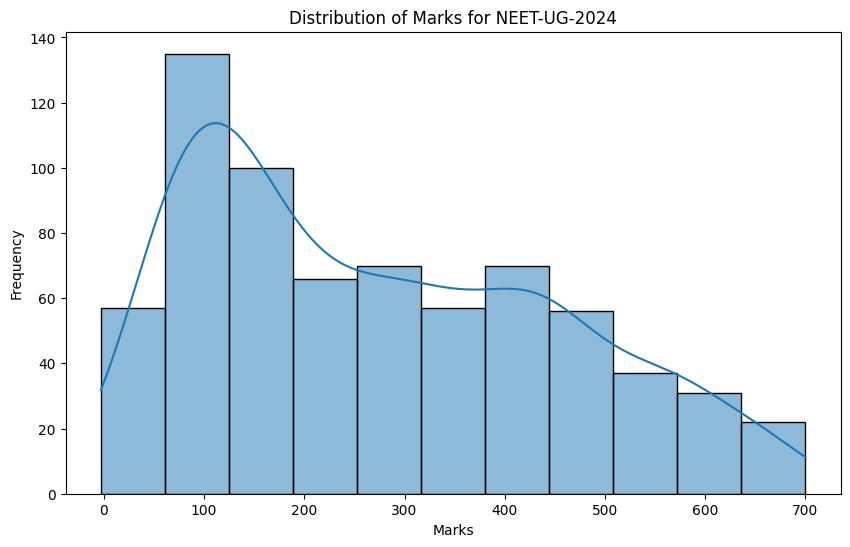

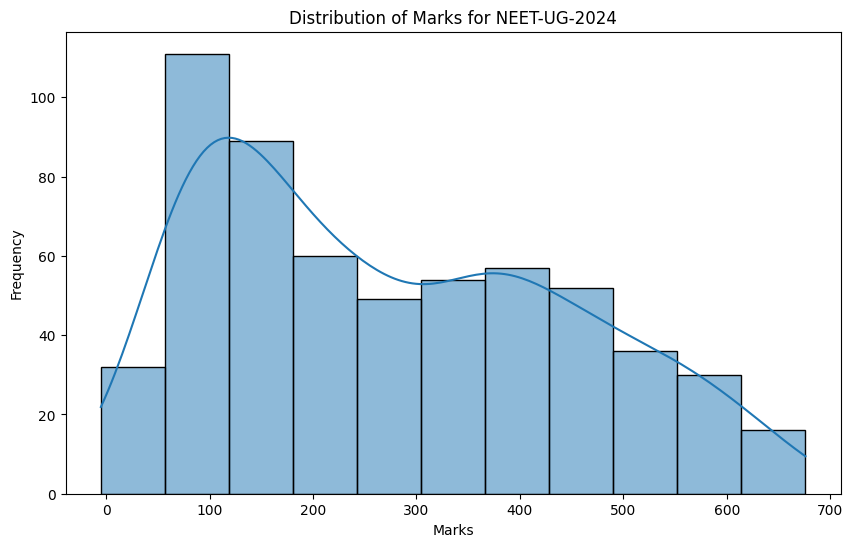

In [18]:

# Get the first five unique centers
centers = marks_2024['center_number'].unique()[:5]

for i in centers:
    plt.figure(figsize=(10, 6))
    sns.histplot(marks_2024[marks_2024['center_number']==i]['Marks'], kde=True)
    plt.title('Distribution of Marks for NEET-UG-2024')
    plt.xlabel('Marks')
    plt.ylabel('Frequency')
    plt.show()

the p-values are very low, but are similar, so we can say that scores at the centers is not representative, so we can not say about malpractice with comparison of marks distribution individually for the centers

part3


With macroscopic data we have a conclusion that the distributions are genextreme and pvalue = 0.996(null hypothesis-2023 and 2024 distributions are different) which suggests there is no widespread malpractice.

To findout the malpractice we need microscopic data like:
1) CCTV footage
2) individual test scores
3) time spent by suspects on difficult questions
4) Previous Exam Performance of suspect if attempted
5) using anomaly detection for marks distibution for individual centers
